<center><img src="graphics/Logolink_OP_VVV_hor_barva_cz.jpg" width="600px"/></center>
<center>ESF projekt Západočeské univerzity v Plzni reg. č. CZ.02.2.69/0.0/0.0/16 015/0002287</center>

# Graph-Cut Segmentation


## Install

```commandline
conda install -c mjirik -c conda-forge pygco imcut

```

# Graph-Cut

In [1]:
import numpy as np
# pip install pygco
import pygco
img = np.array([[10, 9, 2],
                [8, 10, 1],
                [10, 1, 2]], dtype=np.int32)

## Simple Graph-Cut with constant N-links

In [2]:
lambd = 1
pairwise_alpha = -1

# T-links setup
unaries = np.zeros([3,3,2], dtype=np.int32)
unaries[:,:,0] = lambd * img
unaries[:,:,1] = lambd * (10 - img)


pairwise = pairwise_alpha * np.eye(2, dtype=np.int32)


pygco.cut_simple(unaries, pairwise)

array([[1, 1, 0],
       [1, 1, 0],
       [1, 0, 0]])

## Graph-Cut with N-links

In [4]:
import scipy
import scipy.ndimage
import scipy.ndimage.filters
costv = scipy.ndimage.filters.convolve(img, [[1],[-1]])
costh = scipy.ndimage.filters.convolve(img, [[1, -1]])
# costv = 1
# costh = 1
costv = 10 - np.abs(costv[:, :])
costh = 10 - np.abs(costh[:, :])
print(img)
print(costv)
print(costh)

pygco.cut_simple_vh(unaries, pairwise, costh, costv)

[[10  9  2]
 [ 8 10  1]
 [10  1  2]]
[[ 8  9  9]
 [ 8  1  9]
 [10 10 10]]
[[ 9  3 10]
 [ 8  1 10]
 [ 1  9 10]]


array([[1, 1, 0],
       [1, 1, 0],
       [1, 0, 0]])

## General Graph construction

In [5]:
# use the gerneral graph algorithm
# first, we construct the grid graph
inds = np.arange(img.size).reshape(img.shape)
horz = np.c_[inds[:, :-1].ravel(), inds[:, 1:].ravel()]
vert = np.c_[inds[:-1, :].ravel(), inds[1:, :].ravel()]
edges = np.vstack([horz, vert]).astype(np.int32)



result_graph = pygco.cut_from_graph(edges, unaries.reshape(-1, 2), pairwise)
result_graph.reshape(img.shape)

array([[1, 1, 0],
       [1, 1, 0],
       [1, 0, 0]])

# `imcut` package

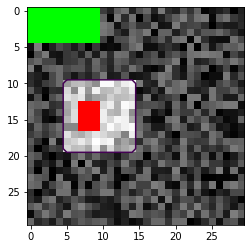

In [8]:
import numpy as np
from imcut import pycut
import matplotlib.pyplot as plt

# create data
data = np.random.rand(30, 30, 30)
data[10:20, 5:15, 3:13] += 1
data = data * 30
data = data.astype(np.int16)

# Make seeds
seeds = np.zeros([30, 30, 30])
seeds[13:17, 7:10, 5:11] = 1
seeds[0:5:, 0:10, 0:11] = 2

# Run
igc = pycut.ImageGraphCut(data, voxelsize=[1, 1, 1])
igc.set_seeds(seeds)
igc.run()

# Show results
colormap = plt.cm.get_cmap('brg')
colormap._init()
colormap._lut[:1:, 3] = 0

plt.imshow(data[:, :, 10], cmap='gray')
plt.contour(igc.segmentation[:, :, 10], levels=[0.5])
plt.imshow(igc.seeds[:, :, 10], cmap=colormap, interpolation='none')
# plt.savefig("gc_example.png")
plt.show()

## Model debug

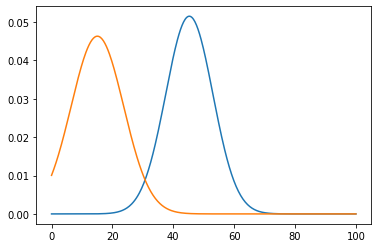

In [10]:
a = igc.debug_show_model(start=0, stop=100)

## Change model parameters

In [12]:
segparams = {
    # 'method':'graphcut',
    'method': 'graphcut',
    'use_boundary_penalties': False,
    'boundary_dilatation_distance': 2,
    'boundary_penalties_weight': 1,
    'modelparams': {
        'type': 'gmmsame',
        'params': {
            "n_components": 2
        }
        # "return_only_object_with_seeds": True,
        # 'fv_type': "fv_extern",
        # 'fv_extern': fv_function,
        # 'adaptation': 'original_data',
    }
}

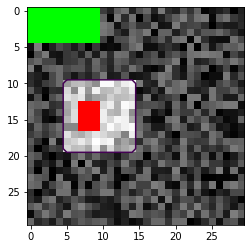

In [13]:
# Run
igc = pycut.ImageGraphCut(data, voxelsize=[1, 1, 1], segparams=segparams)
igc.set_seeds(seeds)
igc.run()

# Show results
colormap = plt.cm.get_cmap('brg')
colormap._init()
colormap._lut[:1:, 3] = 0

plt.imshow(data[:, :, 10], cmap='gray')
plt.contour(igc.segmentation[:, :, 10], levels=[0.5])
plt.imshow(igc.seeds[:, :, 10], cmap=colormap, interpolation='none')
# plt.savefig("gc_example.png")
plt.show()

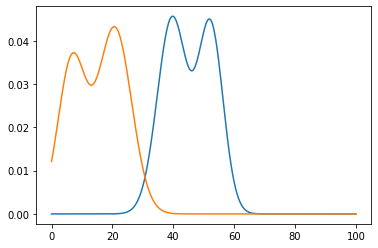

In [14]:
a = igc.debug_show_model(start=0, stop=100)

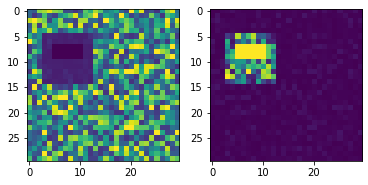

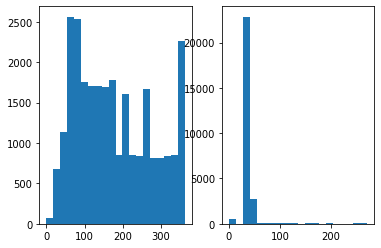

In [16]:
igc.debug_show_reconstructed_similarity()